Загружаем датасет при помощи load_digits из sklearn.datasets и подготовьте матрицу _признаков_ X и ответы на обучающей выборке y (вам потребуются поля data и target в объекте, который возвращает load_digits) 

In [1]:
import sklearn
import pandas as pd
import numpy as np
from sklearn import model_selection, datasets, metrics, tree,ensemble
from sklearn.datasets import load_digits
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd

In [ ]:
from skl

In [10]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [11]:
#будем выводить все прямо в юпитере, а не через доп окна и вкладки
%matplotlib inline

In [12]:
digits=load_digits()
print(digits.data.shape)

(1797, 64)


In [13]:
digits.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

Встроенная в Python функция enumerate() применяется для итерируемых коллекций (строки, списки, словари и др.) и создает объект, который генерирует кортежи, состоящие из двух элементов - индекса элемента и самого элемента.zip - Функция принимает итераторы (то есть последовательности) в качестве аргументов и возвращает то же итератор.Этот итератор генерирует серию кортежей, содержащих элементы из каждой итерации.

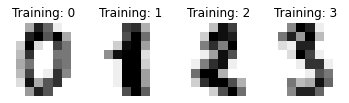

In [14]:
#Это не совсем нужно
images_and_labels = list(zip(digits.images, digits.target))
for index, (image, label) in enumerate(images_and_labels[:4]):
    plt.subplot(2, 4, index + 1) #2 строки, 4 столбца, индекс элемента+1
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Training: %i' % label)

In [15]:
X=digits.data
Y=digits.target

In [16]:
#X-матрица признаков (обучающая выборка)
print(X,X.shape)

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]] (1797, 64)


In [17]:
#Узнаем количество столбцов; при 0 узнавали бы количество строк
X.shape[1]

64

In [18]:
#Y-ответы на обучающей выборке (целевой признак)
print(Y,Y.shape)

[0 1 2 ... 8 9 8] (1797,)


In [19]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

In [20]:
#Создадим модель(алгоритм) и сделаем оценку качества при помощи кросс-валидации на 10 фолдов
classifier=DecisionTreeClassifier(random_state=0)
estimation=cross_val_score(classifier,X,Y,cv=10)

In [21]:
mean=estimation.mean()

Найдя среднее, мы и получаем оценку качества

In [22]:
#ответ на 1

In [23]:
mean

0.8241247672253259

In [24]:
file_obj=open('Бэггинг и случайные леса задание 1.txt','w', encoding='utf-8')
string=str(mean)
file_obj.write(string)
file_obj.close()

Воспользуйтесь BaggingClassifier из sklearn.ensemble, чтобы обучить бэггинг над DecisionTreeClassifier. Используйте в BaggingClassifier параметры по умолчанию, задав только количество деревьев равным 100. 

In [25]:
from sklearn.ensemble import BaggingClassifier

In [26]:
#ответ на 2

In [27]:
BagClassifier=BaggingClassifier(n_estimators=100)
Bagestimator=cross_val_score(BagClassifier,X,Y,cv=10)
mean2=Bagestimator.mean()
mean2

0.9220577281191806

In [28]:
file_obj=open('Бэггинг и случайные леса задание 2.txt','w', encoding='utf-8')
string=str(mean2)
file_obj.write(string)
file_obj.close()

In [29]:
#Ответ на 3 вопрос

In [30]:
new_features=int(np.sqrt(X.shape[1]))
BagClassifier=BaggingClassifier(n_estimators=100,max_features=new_features)
Bagestimator=cross_val_score(BagClassifier,X,Y,cv=10)
mean3=Bagestimator.mean()
mean3

0.92931409062694

In [31]:
file_obj=open('Бэггинг и случайные леса задание 3.txt','w', encoding='utf-8')
string=str(mean3)
file_obj.write(string)
file_obj.close()

In [32]:
#ответ на 4 вопрос

In [38]:
classifier2=DecisionTreeClassifier(max_features=new_features)
estimation=cross_val_score(classifier2,X,Y,cv=10)
BagClassifier=BaggingClassifier(base_estimator=classifier2,n_estimators=100)
Bagestimator=cross_val_score(BagClassifier,X,Y,cv=10)
mean4=Bagestimator.mean()
mean4

0.9493513345747981

In [39]:
file_obj=open('Бэггинг и случайные леса задание 4.txt','w', encoding='utf-8')
string=str(mean4)
file_obj.write(string)
file_obj.close()

In [40]:
#ответ на вопрос 5

In [41]:
from sklearn.ensemble import RandomForestClassifier

In [42]:
random_forest_classifier=RandomForestClassifier(n_estimators=100,random_state=new_features)
scorer=cross_val_score(random_forest_classifier,X,Y,cv=10)
mean5=scorer.mean()
mean5

0.9487988826815641

In [43]:
file_obj=open('Бэггинг и случайные леса задание 5.txt','w', encoding='utf-8')
string='2 3 4 7'
file_obj.write(string)
file_obj.close()

Изучим, как зависит качество от количества деревьев,количества признаков, выбираемых при построении каждой вершины дерева, а также ограничений на глубину дерева.

In [44]:
num_trees=np.arange(1,20,2)
num_features=np.arange(1,X.shape[1]+1,1)
depths=np.arange(1,10,2)

In [45]:
a=[]
for i in num_trees:
    trees=DecisionTreeClassifier()
    model=BaggingClassifier(trees,n_estimators=i)
    scorer=cross_val_score(model,X,Y,cv=10)
    mean_analysis=scorer.mean()
    a.append(mean_analysis)

Text(0, 0.5, 'score')

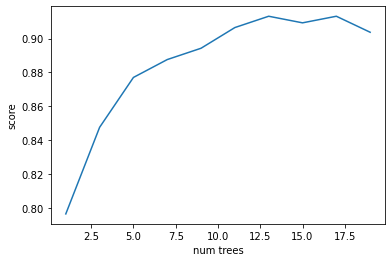

In [46]:
plt.plot(num_trees,a)
plt.xlabel('num trees')
plt.ylabel('score')

In [48]:
b=[]
for i in num_features:
    trees=DecisionTreeClassifier(max_features=i)
    model=BaggingClassifier(base_estimator=trees,max_features=i)
    scorer=cross_val_score(model,X,Y,cv=10)
    mean_analysis=scorer.mean()
    b.append(mean_analysis)

Text(0, 0.5, 'score')

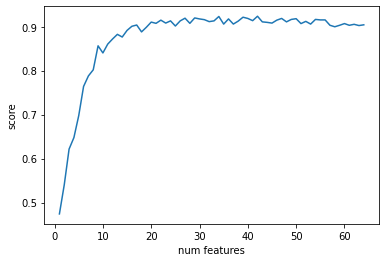

In [49]:
plt.plot(num_features,b)
plt.xlabel('num features')
plt.ylabel('score')

In [50]:
c=[]
for i in depths:
    trees=DecisionTreeClassifier(max_depth=i)
    model=BaggingClassifier(base_estimator=trees)
    scorer=cross_val_score(model,X,Y,cv=10)
    mean_analysis=scorer.mean()
    c.append(mean_analysis)

Text(0, 0.5, 'score')

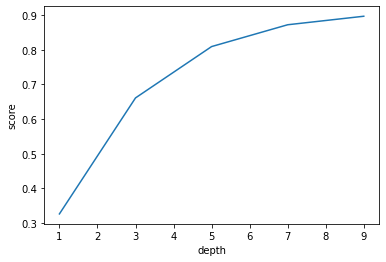

In [52]:
plt.plot(depths,c)
plt.xlabel('depth')
plt.ylabel('score')